# PREDICTING MICRO CREDIT   

Data Description



Importing required libraries.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [4]:
df=pd.read_csv('Micro_credit.csv')

In [5]:
df=pd.DataFrame(df)

In [6]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

pandast.set_option helps to see maximum rows and columns.

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [9]:
df.shape           #checking data dimensional

(209593, 37)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Checking Missing Values

In [11]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Descriptive Statistics

In [12]:
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  \
count      209593.000000     209593.000000  209593.000000  209593.000000   
mean         3712.202921       2064.452797       3.978057    3737.355121   
std         53374.833430       2370.786034       4.256090   53643.625172   
min           -29.000000          0.000000       0.000000       0.000000   
25%             0.000000        770.000000       1.000000       0.000000   
50%             0.000000       1539.000000       3.000000       2.000000   
75%             0.000000       2309.000000       5.000000       6.000000   
max        999171.809410      55000.000000     203.000000  999606.368132   

       sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
count      209593.000000         209593.000000         209593.000000   
mean         7704.501157           1812.817952           3851.927942   
std         10139.621714           2070.864620          54006.374433   
min             0.000000              0.000000           -200.000000   
25%          1540.000000            770.000000             11.000000   
50%          4628.000000           1539.000000             33.900000   
75%         10010.000000           1924.000000             83.000000   
max        810096.000000          55000.000000         999479.419319   

       cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count   209593.00000  209593.000000      209593.000000         209593.000000   
mean         6.31543       7.716780       12396.218352           1864.595821   
std          7.19347      12.590251       16857.793882           2081.680664   
min          0.00000       0.000000           0.000000              0.000000   
25%          2.00000       0.000000        2317.000000            773.000000   
50%          4.00000       2.000000        7226.000000           1539.000000   
75%          8.00000       8.000000       16000.000000           1924.000000   
max        336.00000      88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.0

In [ ]:
 We can see that the standard deviation is high in all the columns, it means there is skewness in the given dataset. 

    Also we can see that the minimum and maximum value has high difference so scalling is required.   


Visualization

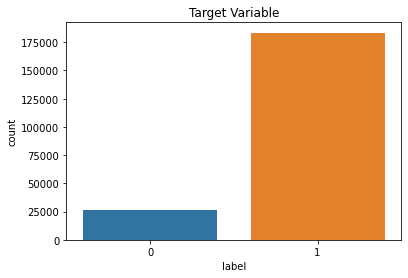

In [13]:
plt.title('Target Variable')
sns.countplot(df.label)
plt.show()

Correlation Matrix

In [14]:
corr=df.corr()

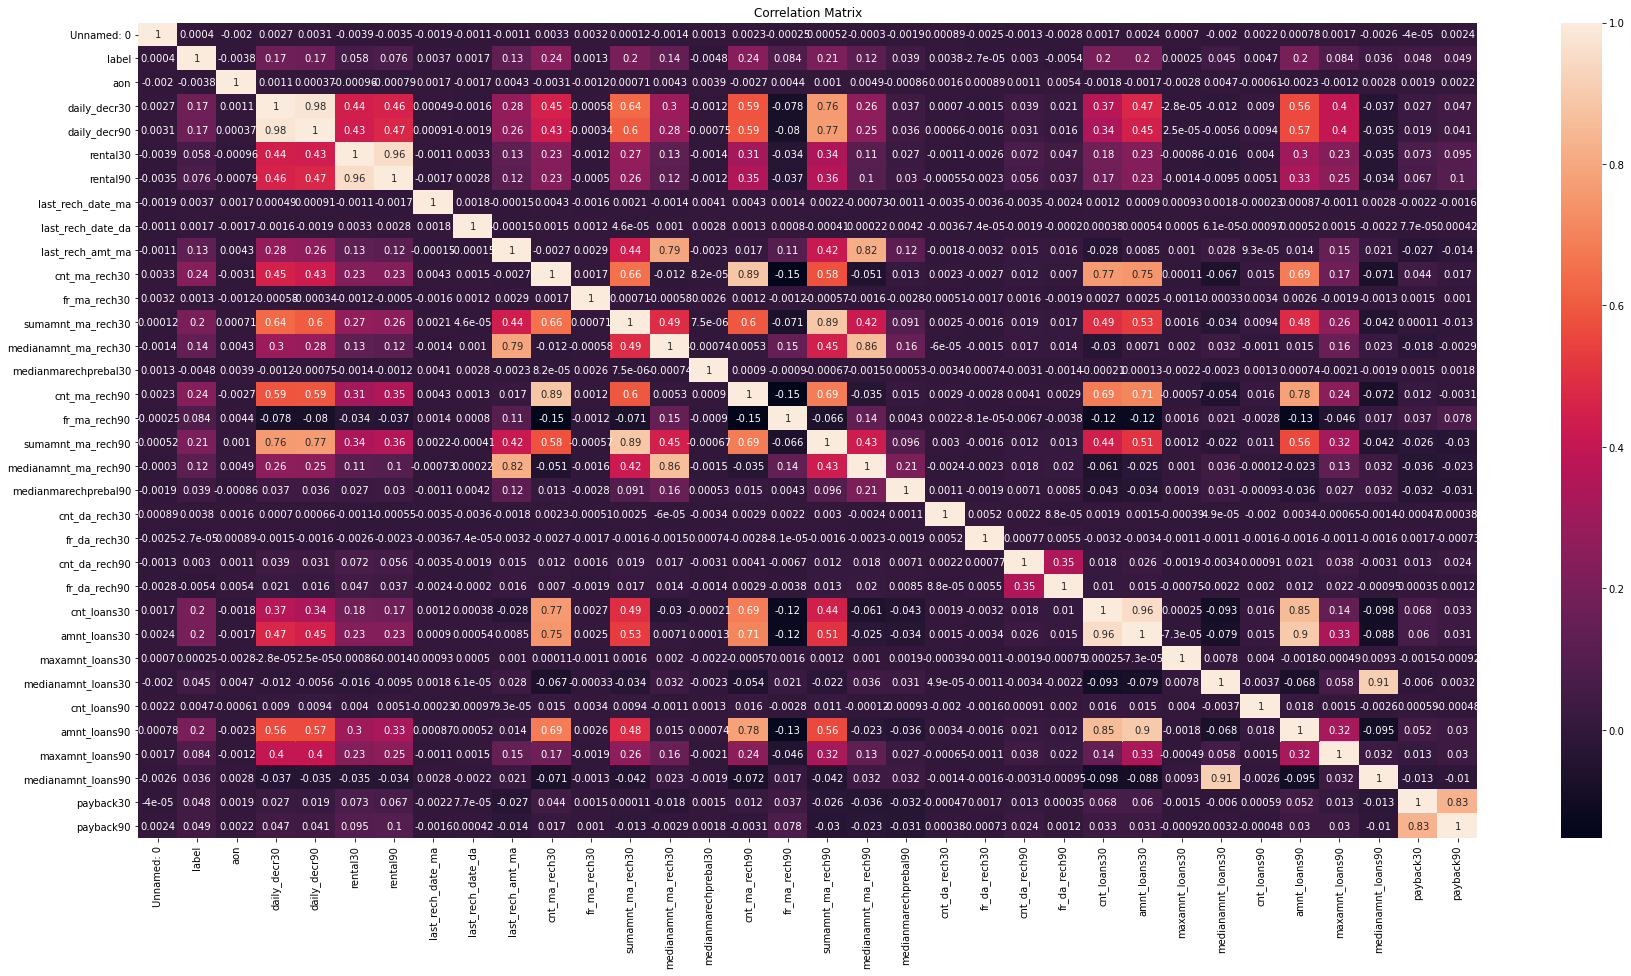

In [15]:
plt.figure(figsize=(30,15))
plt.title('Correlation Matrix')
sns.heatmap(corr,annot=True,color='green')
plt.show()

In [16]:
corr.label.sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

Checking Skewness

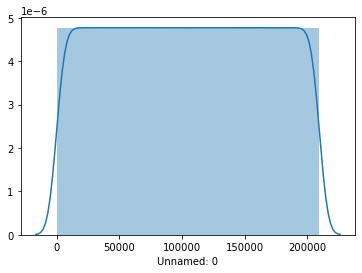

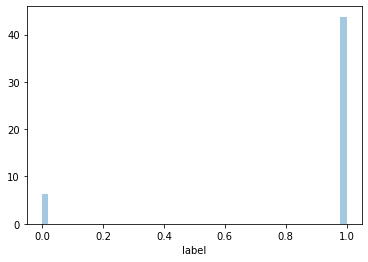

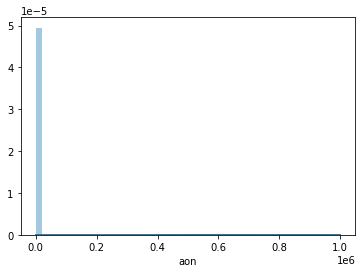

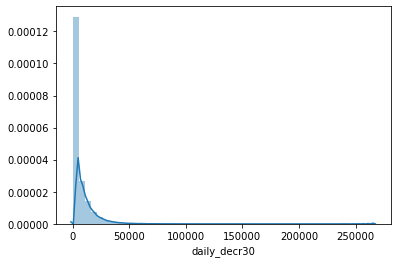

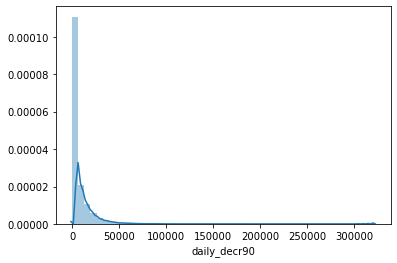

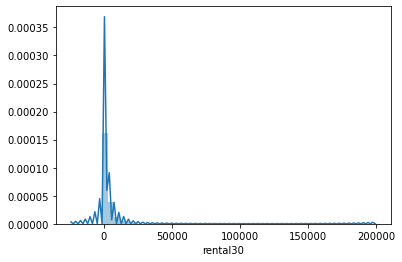

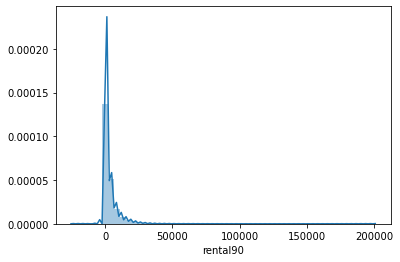

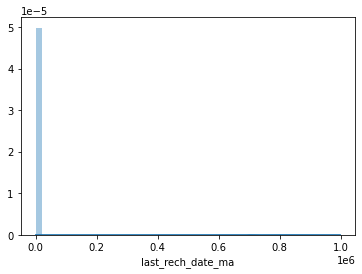

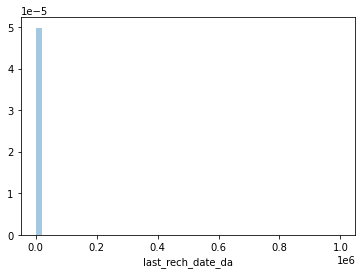

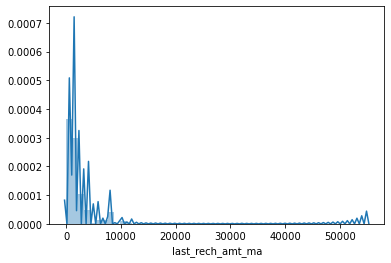

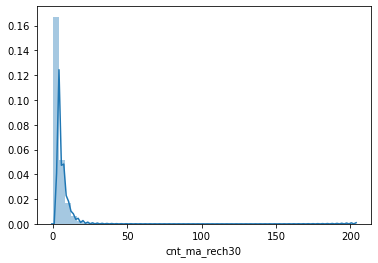

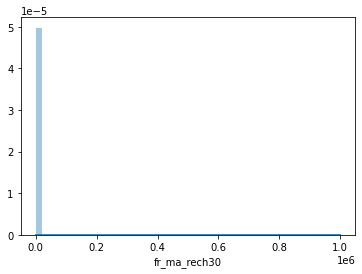

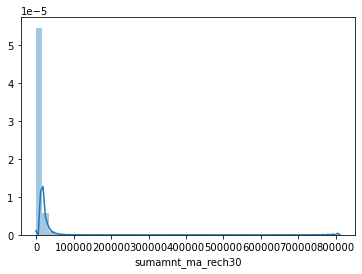

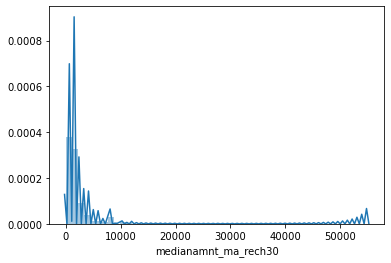

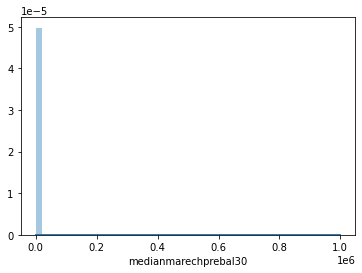

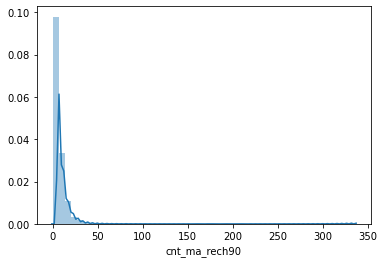

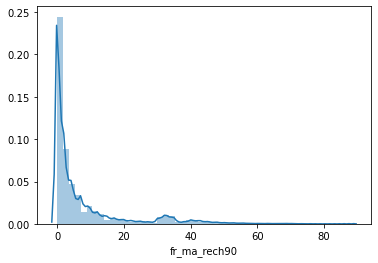

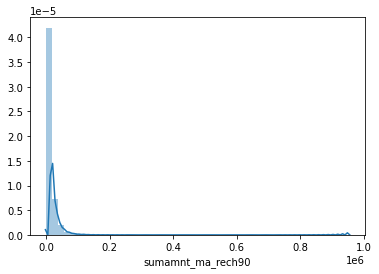

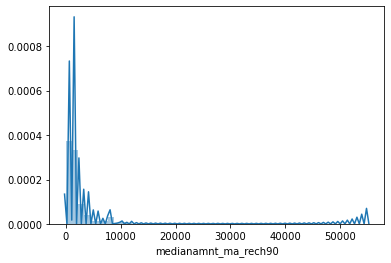

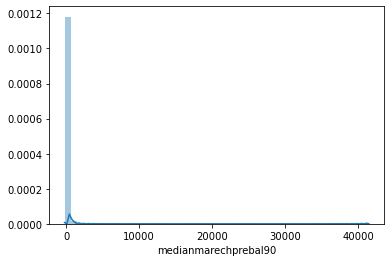

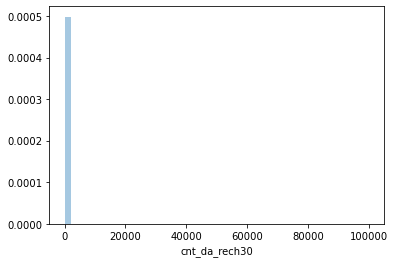

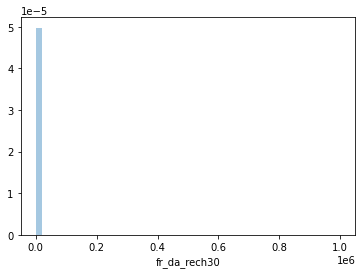

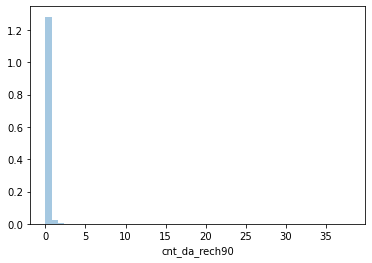

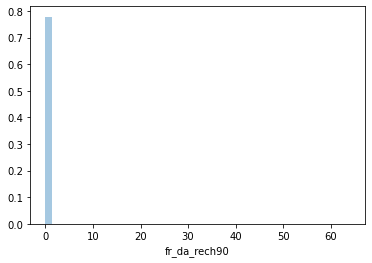

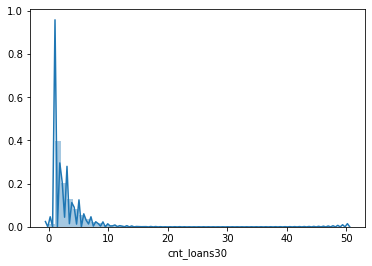

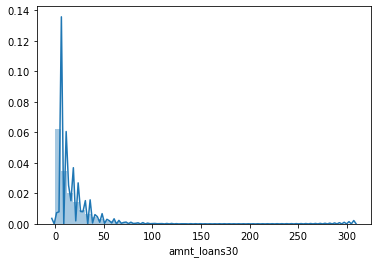

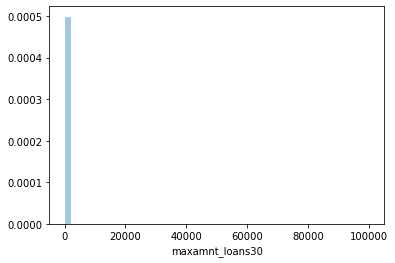

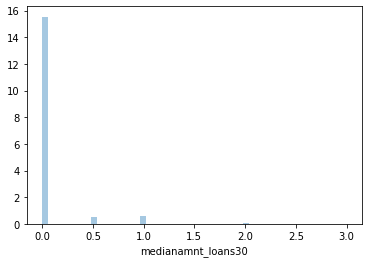

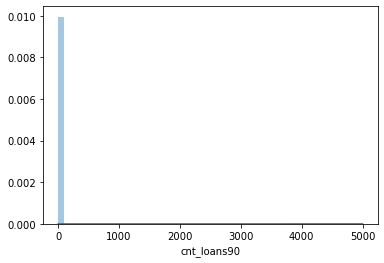

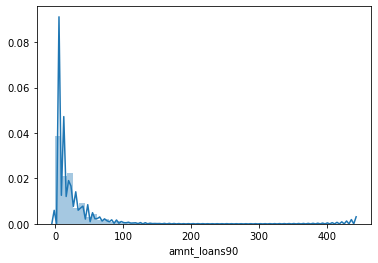

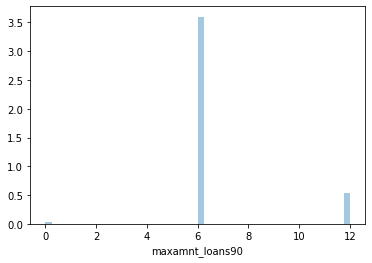

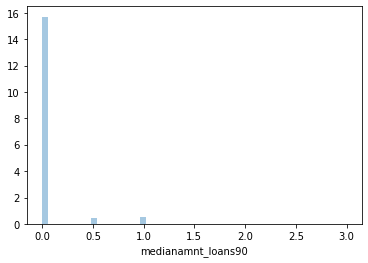

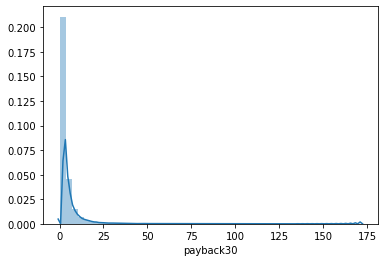

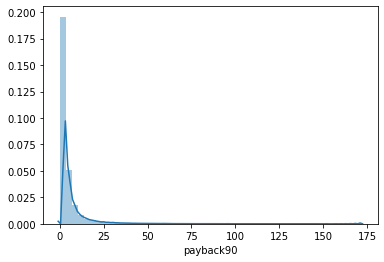

In [17]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()

In [18]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [19]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [20]:
df.drop(['Unnamed: 0','msisdn','pcircle','pdate'],axis=1,inplace=True)

In [21]:
df_new=np.sqrt(df)

In [22]:
df_new=pd.DataFrame(df_new,columns=df.columns)

In [23]:
df_new.skew()

label                   -2.270254
aon                      9.782738
daily_decr30             1.122053
daily_decr90             1.226440
rental30                 1.270666
rental90                 1.332939
last_rech_date_ma       14.186147
last_rech_date_da       14.241534
last_rech_amt_ma         0.802577
cnt_ma_rech30            0.362582
fr_ma_rech30            14.226866
sumamnt_ma_rech30        0.816228
medianamnt_ma_rech30     0.629621
medianmarechprebal30    13.933260
cnt_ma_rech90            0.618678
fr_ma_rech90             1.038194
sumamnt_ma_rech90        0.983177
medianamnt_ma_rech90     0.767860
medianmarechprebal90     4.182553
cnt_da_rech30           15.558988
fr_da_rech30            14.239832
cnt_da_rech90            8.187518
fr_da_rech90            19.692216
cnt_loans30              1.076620
amnt_loans30             1.151154
maxamnt_loans30         15.486858
medianamnt_loans30       3.701226
cnt_loans90             13.841928
amnt_loans90             1.347151
maxamnt_loans9

Removing outliers

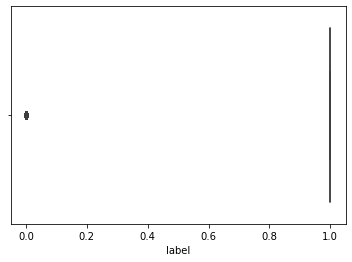

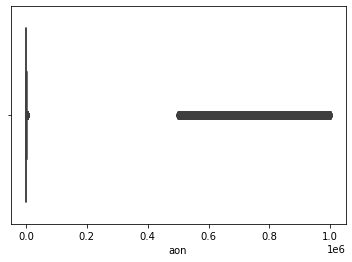

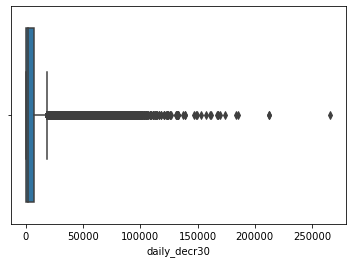

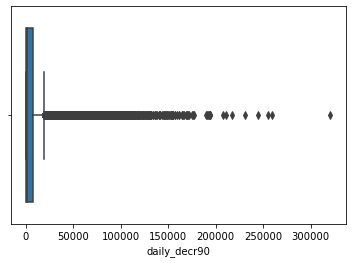

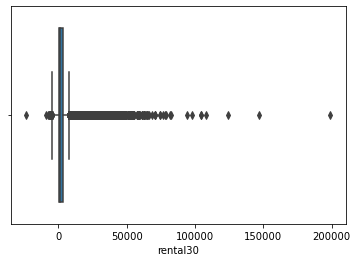

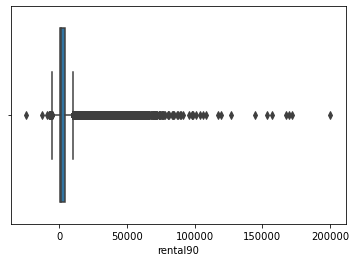

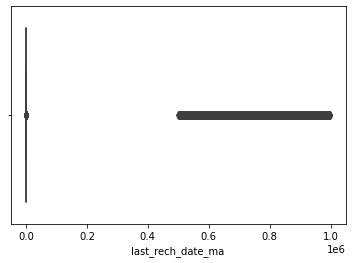

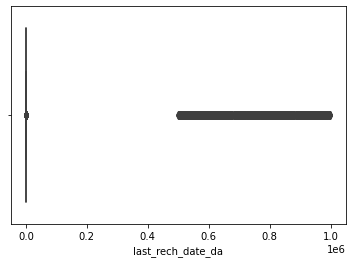

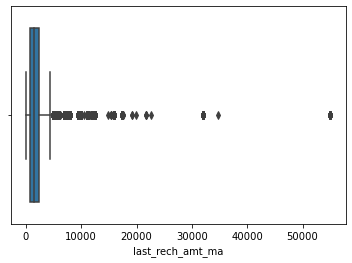

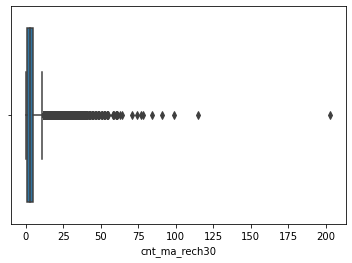

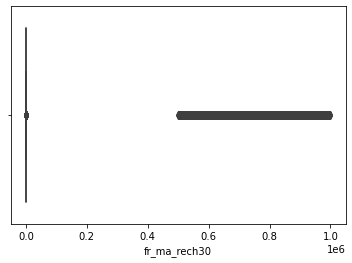

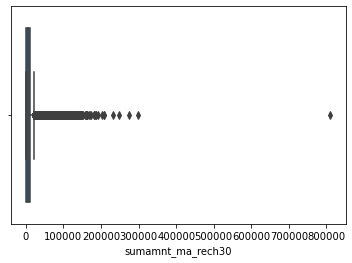

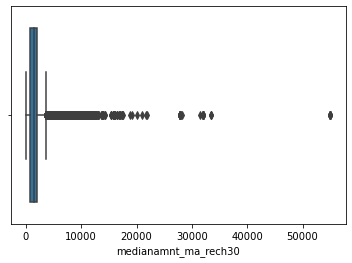

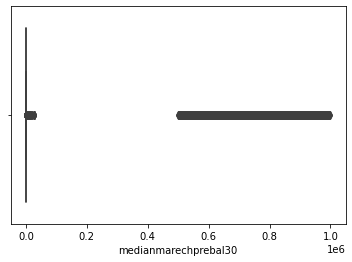

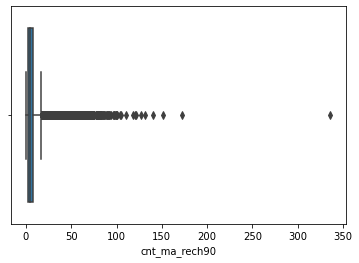

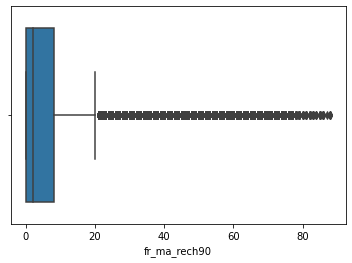

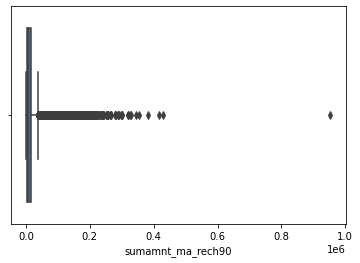

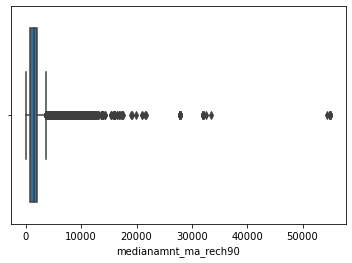

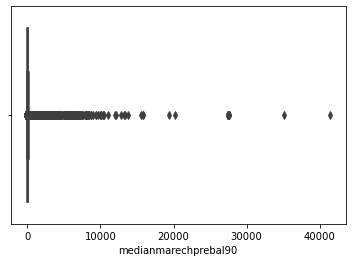

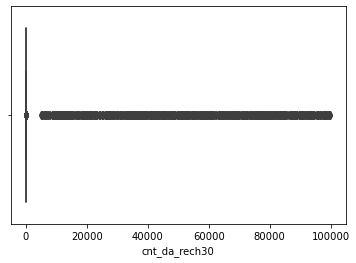

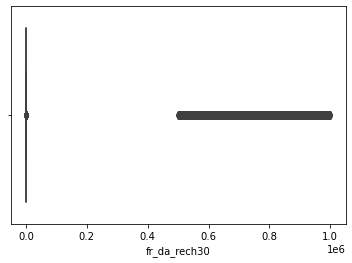

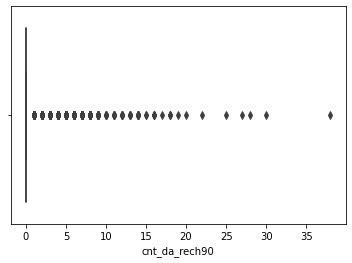

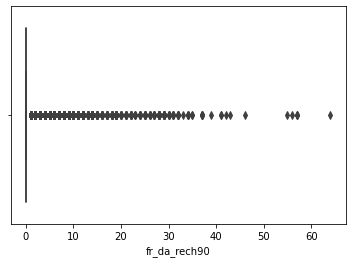

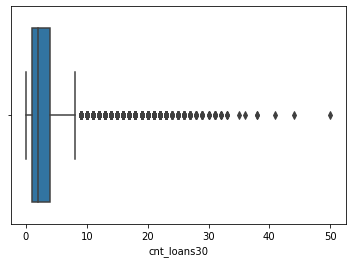

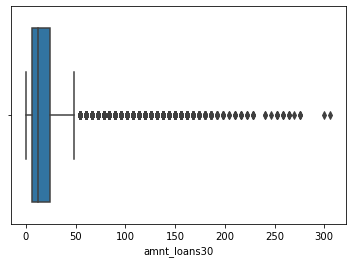

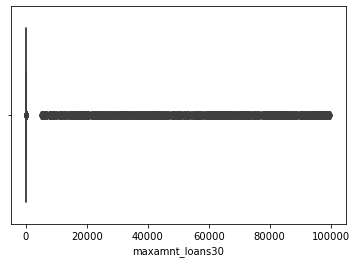

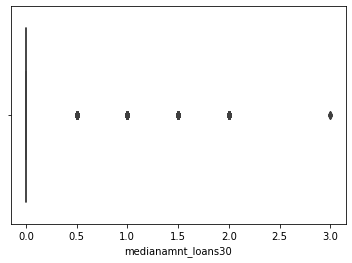

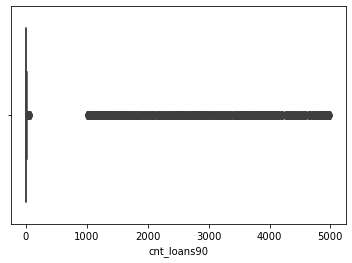

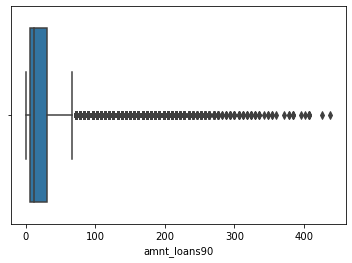

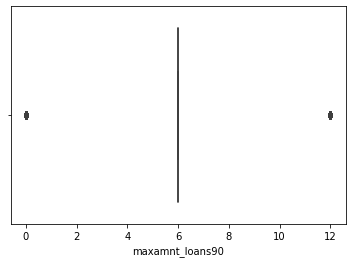

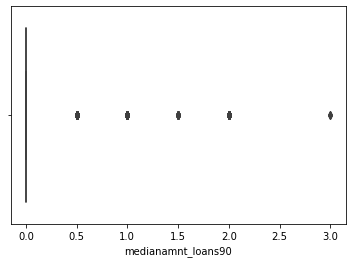

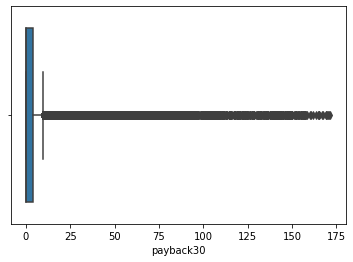

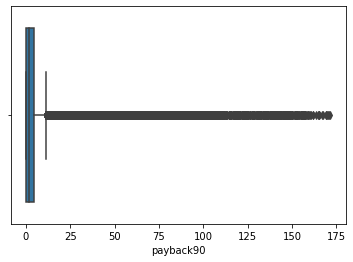

In [24]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

In [25]:
from scipy.stats import zscore

In [26]:
z=np.abs(zscore(df))

In [27]:
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [28]:
threshold=4
print(np.where(z>4))

(array([    21,     22,     30, ..., 209580, 209587, 209587], dtype=int64), array([15, 15,  6, ..., 12, 26, 30], dtype=int64))


In [29]:
df_new=df[(z<4).all(axis=1)]

In [30]:
df_new.shape

(176905, 33)

In [31]:
df.shape

(209593, 33)

In [32]:
Data_loss=((209593-176905)/209593)*100

In [33]:
Data_loss

15.595940704126567

In [34]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler 

In [36]:
ms=MinMaxScaler()

In [37]:
x=df.drop('label',axis=1)
y=df['label']

In [38]:
x.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
1  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
2  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
3  241.0     21.228000     21.228000    159.42    159.42               41.0   
4  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                0.0              1539              2          21.0   
1                0.0              5787              1           0.0   
2                0.0              1539              1           0.0   
3                0.0               947              0           0.0   
4                0.0              2309              7           2.0   

   sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
0             3078.0                1539.0                  7.50   
1             5787.0                5787.0                 61.04   
2             1539.0                1539.0                 66.32   
3                0.0                   0.0                  0.00   
4            20029.0                2309.0                 29.00   

   cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0              2            21               3078                1539.0   
1              1             0               5787                5787.0   
2              1             0               1539                1539.0   
3              1             0                947                 947.0   
4              8             2              23496                2888.0   

   medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
0                  7.50            0.0           0.0              0   
1                 61.04            0.0           0.0              0   
2                 66.32            0.0           0.0              0   
3                  2.50            0.0           0.0              0   
4                 35.00            0.0           0.0              0   

   fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0             0            2            12              6.0   
1             0            1            12             12.0   
2             0            1             6              6.0   
3             0            2            12              6.0   
4             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

In [39]:
x_new=ms.fit_transform(x)

In [40]:
x_new=pd.DataFrame(x_new,columns=x.columns)

In [41]:
x=x_new

In [42]:
x.head()

aon  daily_decr30  daily_decr90  rental30  rental90  \
0  0.000320      0.011834      0.009847  0.107594  0.111090   
1  0.000760      0.045918      0.038094  0.123183  0.126349   
2  0.000583      0.005605      0.004649  0.110648  0.113936   
3  0.000289      0.000429      0.000356  0.107322  0.110642   
4  0.000995      0.000916      0.000760  0.111541  0.114820   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0           0.000031           0.000029          0.027982       0.009852   
1           0.000049           0.000029          0.105218       0.004926   
2           0.000032           0.000029          0.027982       0.004926   
3           0.000070           0.000029          0.017218       0.000000   
4           0.000033           0.000029          0.041982       0.034483   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0      0.000021           0.003800              0.027982   
1      0.000000           0.007144              0.105218   
2      0.000000           0.001900              0.027982   
3      0.000000           0.000000              0.000000   
4      0.000002           0.024724              0.041982   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0              0.000208       0.005952      0.238636           0.003230   
1              0.000261       0.002976      0.000000           0.006072   
2              0.000266       0.002976      0.000000           0.001615   
3              0.000200       0.002976      0.000000           0.000994   
4              0.000229       0.023810      0.022727           0.024654   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0              0.027982              0.004981            0.0           0.0   
1              0.105218              0.006266            0.0           0.0   
2              0.027982              0.006393            0.0           0.0   
3              0.017218              0.004861            0.0           0.0   
4              0.052509              0.005641            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0            0.0           0.0         0.04      0.039216          0.00006   
1            0.0           0.0         0.02      0.039216          0.00012   
2            0.0           0.0         0.02      0.019608          0.00006   
3            0.0           0.0         0.04      0.039216          0.00006   
4            0.0           0.0         0.14      0.137255          0.00006   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0     0.000400      0.027397              0.5   
1                 0.0     0.000200      0.027397              1.0   
2                 0.0     0.000200      0.013699              0.5   
3                 0.0     0.000400      0.027397              0.5   
4                 0.0     0.001401      0.095890              0.5   

   medianamnt_loans90  payback30  payback90  
0                 0.0   0.169096   0.169096  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   0.013605   0.013605

Required Machine Learning Libraries

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
lr=LogisticRegression()
dr=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

In [48]:
model=[lr,dr,rf,kn]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [50]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.8759661566843729
[[   25  7771]
 [   28 55054]]
              precision    recall  f1-score   support

           0       0.47      0.00      0.01      7796
           1       0.88      1.00      0.93     55082

    accuracy                           0.88     62878
   macro avg       0.67      0.50      0.47     62878
weighted avg       0.83      0.88      0.82     62878



accuracy score of DecisionTreeClassifier() is:
0.8655968701294571
[[ 3814  3982]
 [ 4469 50613]]
              precision    recall  f1-score   support

           0       0.46      0.49      0.47      7796
           1       0.93      0.92      0.92     55082

    accuracy                           0.87     62878
   macro avg       0.69      0.70      0.70     62878
weighted avg       0.87      0.87      0.87     62878



accuracy score of RandomForestClassifier() is:
0.9133242151467922
[[ 3429  4367]
 [ 1083 53999]]
              precision    recall  f1-score   support



Cross_Validation

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
Lrs=cross_val_score(lr,x,y,cv=5)
print('cross validation of LogisticRegression:',Lrs.mean())

cross validation of LogisticRegression: 0.8752439252506317


In [53]:
from sklearn.model_selection import cross_val_predict

In [54]:
y_pred=cross_val_predict(lr,x,y,cv=5)

In [55]:
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

[[   109  26053]
 [    95 183336]]
              precision    recall  f1-score   support

           0       0.53      0.00      0.01     26162
           1       0.88      1.00      0.93    183431

    accuracy                           0.88    209593
   macro avg       0.70      0.50      0.47    209593
weighted avg       0.83      0.88      0.82    209593



In [56]:
drs=cross_val_score(dr,x,y,cv=5)
print('cross validation of DecisionTreeClassifier:',drs.mean())

cross validation of DecisionTreeClassifier: 0.8666463090515772


In [57]:
y_pred=cross_val_predict(dr,x,y,cv=5)

In [58]:
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

[[ 12952  13210]
 [ 14865 168566]]
              precision    recall  f1-score   support

           0       0.47      0.50      0.48     26162
           1       0.93      0.92      0.92    183431

    accuracy                           0.87    209593
   macro avg       0.70      0.71      0.70    209593
weighted avg       0.87      0.87      0.87    209593



In [59]:
rds=cross_val_score(rf,x,y,cv=5)
print('cross validation of Randomforestregressor:',rds.mean())

cross validation of Randomforestregressor: 0.9132032082016096


In [60]:
y_pred=cross_val_predict(rf,x,y,cv=5)

In [61]:
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

[[ 11576  14586]
 [  3652 179779]]
              precision    recall  f1-score   support

           0       0.76      0.44      0.56     26162
           1       0.92      0.98      0.95    183431

    accuracy                           0.91    209593
   macro avg       0.84      0.71      0.76    209593
weighted avg       0.90      0.91      0.90    209593



In [62]:
kns=cross_val_score(kn,x,y,cv=5)
print('cross validation of Kneighbors:',kns.mean())

cross validation of Kneighbors: 0.8864036449320836


In [63]:
y_pred=cross_val_predict(kn,x,y,cv=5)

In [64]:
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

[[  9716  16446]
 [  7363 176068]]
              precision    recall  f1-score   support

           0       0.57      0.37      0.45     26162
           1       0.91      0.96      0.94    183431

    accuracy                           0.89    209593
   macro avg       0.74      0.67      0.69    209593
weighted avg       0.87      0.89      0.88    209593



Hyper parameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
grid_param={'n_estimators': [200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7],'criterion' :['gini', 'entropy']}

In [67]:
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=3)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 200}


In [68]:
gd_pred=gd.best_estimator_.predict(x_test)

In [69]:
accuracy_score(y_test,gd_pred)

0.9054041159069945

In [70]:
print(confusion_matrix(y_test,gd_pred))
print(classification_report(y_test,gd_pred))

[[ 2375  5421]
 [  527 54555]]
              precision    recall  f1-score   support

           0       0.82      0.30      0.44      7796
           1       0.91      0.99      0.95     55082

    accuracy                           0.91     62878
   macro avg       0.86      0.65      0.70     62878
weighted avg       0.90      0.91      0.89     62878

